<a href="https://colab.research.google.com/github/NoahGarVill/UFV-Visualizacion/blob/main/EJERCICIOS%20DE%20CLASE/PR%C3%81CTICA_1_Estudio_de_Ventas_en_Europa_NOAH_GARC%C3%8DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 1: Estudio de Ventas en Europa - NOAH GARCÍA

## Introducción
Lectura de la base de datos y estudio de los datos.

In [ ]:
from os import sep
import pandas as pd
import seaborn as sns
from IPython.display import display
import plotly.express as px

# Leer el archivo CSV
df = pd.read_csv('datos_ejercicio_ventas.csv', sep=';')
df.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,"7,54E+15"
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,"5,6E+15"
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,"8,85E+15"
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,"3,63E+15"
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,"3,96E+16"


In [ ]:
print(df.head())

         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR    AMOUNT  
0         2023.0  7,54E+15  
1         2023.0   5,6E+15  
2         2023.0  8,85E+15  
3         2023.0  3,63E+15  
4         2023.0  3,96E+16  


### Número de filas y columnas del DataFrame

In [ ]:
# Obtener el número de filas y columnas del DataFrame
num_filas, num_columnas = df.shape

# Imprimir el tamaño del conjunto de datos
print(f"\nEl conjunto de datos tiene {num_filas} filas y {num_columnas} columnas.")


El conjunto de datos tiene 18666 filas y 8 columnas.


### Cuenta la cantidad de "actual" y "AI_forecast"

In [ ]:
# Contar la cantidad de "Actual" y "Forecast" en la columna SCENARIO
counts = df['SCENARIO'].value_counts()

# Imprimir los resultados
print(counts)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


### Horizonte de predicción

In [ ]:
# Calcular el horizonte de predicción como la diferencia entre 'FORECAST_YEAR' y 'YEAR'
# Filtrar el DataFrame para obtener solo las filas con SCENARIO 'AI_forecast'
ai_forecast_df = df[df['SCENARIO'] == 'AI_forecast']

# Calcular el horizonte de predicción como la diferencia entre 'FORECAST_YEAR' y 'YEAR'
ai_forecast_df = ai_forecast_df.copy()  # Esto evita advertencias de copia en Colab
ai_forecast_df['HORIZONTE_PREDICCION'] = ai_forecast_df['FORECAST_YEAR'] - ai_forecast_df['YEAR']

# Mostrar los diferentes horizontes de predicción únicos
unique_horizons = ai_forecast_df['HORIZONTE_PREDICCION'].unique()
print("Horizontes de predicción únicos:", unique_horizons)


Horizontes de predicción únicos: [ 0. -1. -2.]


Este resultado muestra que los pronósticos en los datos de **AI_Forecast** se hacen para el mismo año o con uno o dos años de anticipación. Esto es común en análisis de predicciones, donde se proyectan datos para el año siguiente o el que sigue.

### Número de países y de producto

In [ ]:
# Obtener el número de países únicos
num_paises = df['COUNTRY'].nunique()

# Obtener el número de productos únicos
num_productos = df['SUBBRAND'].nunique()

# Imprimir los resultados
print(f"El número de países únicos es: {num_paises}")
print(f"El número de productos únicos es: {num_productos}")

El número de países únicos es: 9
El número de productos únicos es: 6


### Histórico de actuals y de forecast


In [ ]:
# Histórico de actual y AI_forectast

# Filtrar el DataFrame para obtener solo las filas con SCENARIO 'Actual'
actual_df = df[df['SCENARIO'] == 'actual']

# Filtrar el DataFrame para obtener solo las filas con SCENARIO 'AI_Forecast'
ai_forecast_df = df[df['SCENARIO'] == 'AI_forecast']

# Imprimir el histórico de 'Actual'
print("Histórico de Actual:")
display(actual_df)


# Imprimir el histórico de 'AI_Forecast'
print("\nHistórico de AI_Forecast:")
display(ai_forecast_df)

Histórico de Actual:


,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
277,Portugal,Pepsi Max (L3),2023,10,actual,NaN,NaN,"1,89E+16"
278,Portugal,7up (L3),2023,3,actual,NaN,NaN,"2,93E+15"
279,Portugal,7up (L3),2023,10,actual,NaN,NaN,"3,48E+16"
280,Great Britain,7up Free (L3),2023,10,actual,NaN,NaN,"1,17E+16"
281,Norway,Pepsi Regular (L3),2023,10,actual,NaN,NaN,"3,78E+15"
...,...,...,...,...,...,...,...,...
18595,Great Britain,Lipton (L3),2023,9,actual,NaN,NaN,"8,49E+15"
18596,Italy,Pepsi Regular (L3),2023,9,actual,NaN,NaN,"1,56E+16"
18597,Great Britain,7up Free (L3),2023,9,actual,NaN,NaN,"1,29E+15"
18598,Great Britain,Mountain Dew (L3),2023,9,actual,NaN,NaN,"2,07E+16"



Histórico de AI_Forecast:


,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,"7,54E+15"
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,"5,6E+15"
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,"8,85E+15"
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,"3,63E+15"
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,"3,96E+16"
...,...,...,...,...,...,...,...,...
18661,Great Britain,Pepsi Regular (L3),2024,2,AI_forecast,AI_P10F,2023.0,"1,31E+16"
18662,Hungary,Pepsi Regular (L3),2024,7,AI_forecast,AI_P07F,2023.0,"1,31E+16"
18663,Norway,7up (L3),2024,1,AI_forecast,AI_P05F,2023.0,0
18664,Portugal,Lipton (L3),2024,3,AI_forecast,AI_P02F,2023.0,"5,33E+15"


### Forecast distintos


In [ ]:
# Obtener los valores únicos en la columna 'FORECAST' para ver los diferentes tipos de pronósticos
distinct_forecasts = ai_forecast_df['FORECAST'].unique()

# Mostrar los diferentes forecast únicos
print("Forecast distintos:", distinct_forecasts)


Forecast distintos: ['AI_P02F' 'AI_P10F' 'AI_P09F' 'AI_P03F' 'AI_PF' 'AI_P11F' 'AI_P06F'
 'AI_P05F' 'AI_P07F' 'AI_P12F' 'AI_P08F' 'AI_P04F']


## 1. Como se distribuyen las ventas realizadas en:

### Cada país

In [ ]:
# Asegúrate de que la columna 'AMOUNT' esté en formato numérico usando .loc para evitar el warning
actual_df.loc[:, 'AMOUNT'] = pd.to_numeric(actual_df['AMOUNT'].str.replace(',', '.'), errors='coerce')

# Agrupar las ventas por país y calcular la suma total de AMOUNT para cada país
sales_distribution = actual_df.groupby('COUNTRY')['AMOUNT'].sum()

# Mostrar la distribución de ventas por país
print("Distribución de ventas realizadas en cada país:")
sales_distribution

Distribución de ventas realizadas en cada país:


,AMOUNT
COUNTRY,
Czech,1116157180901794944.0
Denmark,1122262000000000000.0
Great Britain,1969700977900009933504512.0
Hungary,1261108961394827776.0
Italy,581588200000000000.0
Netherlands,806516700000000000.0
Norway,1414963787000000000.0
Portugal,1089520800000000000.0
Spain,721156690000000000.0


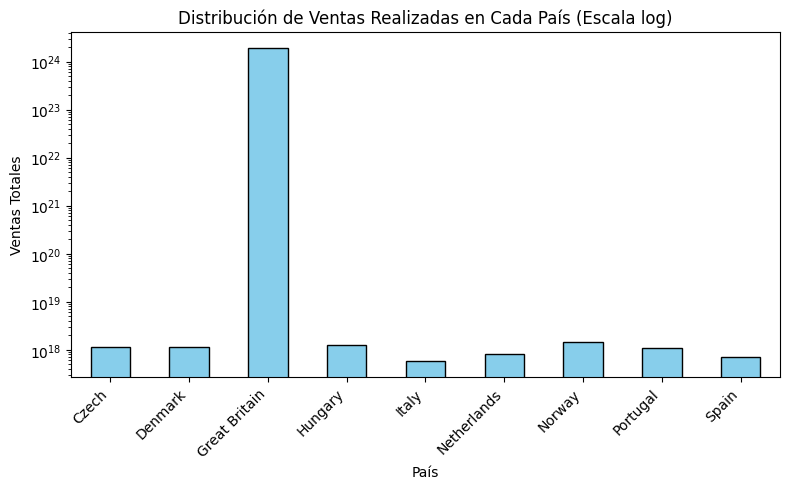

In [ ]:
# Gráfica ventas totales de cada país en escala logaritmíca
plt.figure(figsize=(8, 5))
sales_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas Realizadas en Cada País (Escala log)")
plt.xlabel("País")
plt.ylabel("Ventas Totales")
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


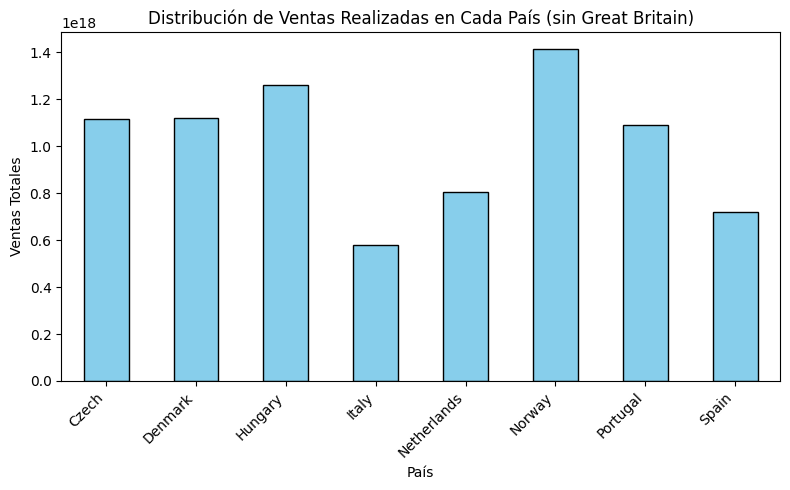

In [ ]:
# Gráfica ventas totales por país excluyendo Great Britain
sales_distribution_wo_gb = sales_distribution.drop('Great Britain')

plt.figure(figsize=(8, 5))
sales_distribution_wo_gb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas Realizadas en Cada País (sin Great Britain)")
plt.xlabel("País")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Cada mes y año

In [ ]:
# Agrupar las ventas por año y mes, calculando la suma de AMOUNT en cada combinación
sales_distribution_month_year = actual_df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

# Mostrar la distribución de ventas por año y mes
print("Distribución de ventas realizadas en cada mes y año:")
sales_distribution_month_year


Distribución de ventas realizadas en cada mes y año:


YEAR  MONTH
2023  1              613413000000000000.0
      2              742076000000000000.0
      3        126000433076999997620224.0
      4        117000573294000000204800.0
      5        139000563233999995011072.0
      6         12800521876000001228800.0
      7        118000523144000031424512.0
      8        132000623900999991427072.0
      9        129000530581779969474560.0
      10       117000660461000048246784.0
      11       136000533730000017293312.0
      12        13900590807999999639552.0
2024  1              531198600000000000.0
      2        115000502030999998169088.0
      3        138000478248000003506176.0
      4        127000583678000023732224.0
      5        148000021072098025799680.0
      6        132000021207810033319936.0
      7        128000019731770844905472.0
      8        141000024411270436356096.0
Name: AMOUNT, dtype: object

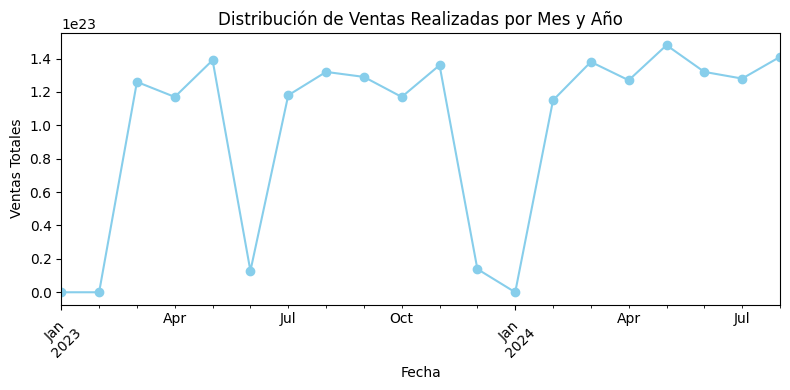

In [ ]:
# Agrupar las ventas por año y mes, calculando la suma de AMOUNT en cada combinación
sales_distribution_month_year = actual_df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

# Convertir el índice a un formato de fecha para una mejor visualización en el gráfico
sales_distribution_month_year.index = pd.to_datetime(sales_distribution_month_year.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

# Graficar la distribución de ventas por mes y año
plt.figure(figsize=(8, 4))
sales_distribution_month_year.plot(kind='line', marker='o', color='skyblue')
plt.title("Distribución de Ventas Realizadas por Mes y Año")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Cada marca

In [ ]:
# Agrupar las ventas por marca (SUBBRAND), calculando la suma de AMOUNT para cada marca
sales_distribution_by_brand = actual_df.groupby('SUBBRAND')['AMOUNT'].sum()

# Mostrar la distribución de ventas por marca
sales_distribution_by_brand

,AMOUNT
SUBBRAND,
7up (L3),1511396200296622848.0
7up Free (L3),1459516209000000000.0
Lipton (L3),1195149612000000000.0
Mountain Dew (L3),967673908000000000.0
Pepsi Max (L3),1969702026591299740631040.0
Pepsi Regular (L3),1930847100000000000.0


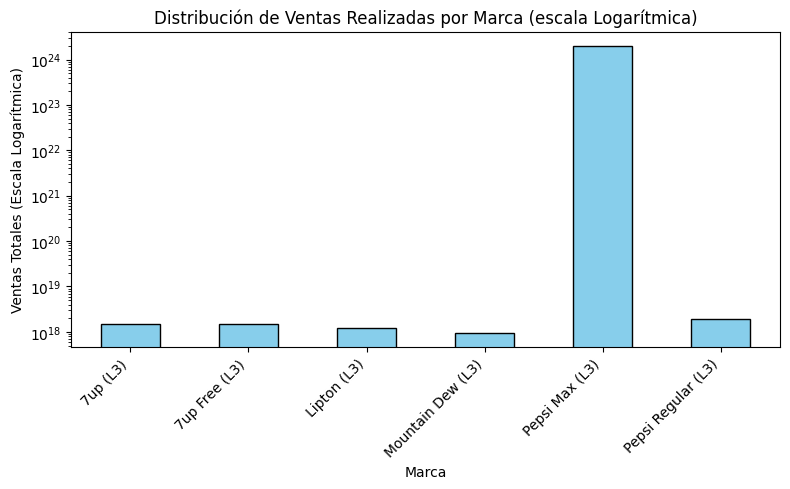

In [ ]:
# Crear la gráfica de barras para la distribución de ventas por marca con escala logarítmica en el eje y
plt.figure(figsize=(8, 5))
sales_distribution_by_brand.plot(kind='bar', color='skyblue', edgecolor='black')
plt.yscale('log')  # Aplicar escala logarítmica al eje y
plt.title("Distribución de Ventas Realizadas por Marca (escala Logarítmica)")
plt.xlabel("Marca")
plt.ylabel("Ventas Totales (Escala Logarítmica)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

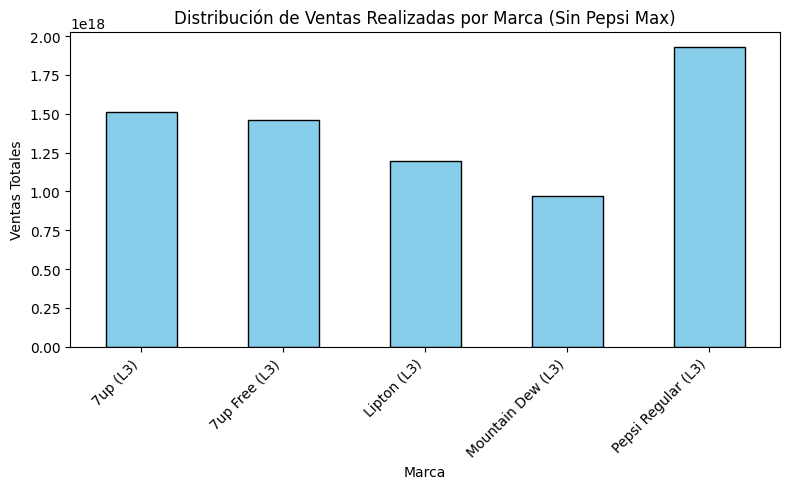

In [ ]:
# Excluir Pepsi Max (L3) de la distribución de ventas por marca
sales_distribution_without_pepsi_max = sales_distribution_by_brand.drop('Pepsi Max (L3)')

# Crear la gráfica de barras para la distribución de ventas por marca sin Pepsi Max (L3)
plt.figure(figsize=(8, 5))
sales_distribution_without_pepsi_max.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas Realizadas por Marca (Sin Pepsi Max)")
plt.xlabel("Marca")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 2. Cual es la tendencia y estacionalidad de:

### Todas las ventas del país con menos ventas


In [ ]:
# Calcular la suma de ventas por país y encontrar el país con menos ventas
sales_by_country = actual_df.groupby('COUNTRY')['AMOUNT'].sum()
country_with_least_sales = sales_by_country.idxmin()

# Filtrar las ventas para el país con menos ventas
least_sales_df = actual_df[actual_df['COUNTRY'] == country_with_least_sales]

# Agrupar las ventas por mes y año para analizar la tendencia y estacionalidad
sales_trend_seasonality = least_sales_df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

# Convertir el índice a un formato de fecha
sales_trend_seasonality.index = pd.to_datetime(sales_trend_seasonality.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

# Mostrar el país con menos ventas y sus ventas mensuales agregadas
country_with_least_sales, sales_trend_seasonality

('Italy',
 2023-01-01    44700000000000000.0
 2023-02-01    23075000000000000.0
 2023-03-01    23860000000000000.0
 2023-04-01    33960000000000000.0
 2023-05-01    40140000000000000.0
 2023-06-01    56500000000000000.0
 2023-07-01    30114000000000000.0
 2023-08-01    55400000000000000.0
 2023-09-01    34840000000000000.0
 2023-10-01    30430000000000000.0
 2023-11-01    14740000000000000.0
 2023-12-01    51900000000000000.0
 2024-01-01    27460000000000000.0
 2024-02-01    46440000000000000.0
 2024-03-01    38100000000000000.0
 2024-04-01    22680000000000000.0
 2024-05-01     1992100000000000.0
 2024-06-01     2345400000000000.0
 2024-07-01      536700000000000.0
 2024-08-01     2375000000000000.0
 Name: AMOUNT, dtype: object)

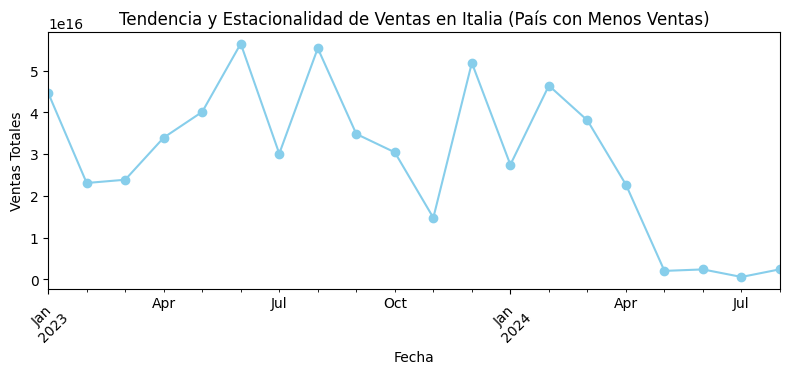

In [ ]:
# Crear la gráfica de líneas para mostrar la tendencia y estacionalidad de las ventas en Italia
plt.figure(figsize=(8, 4))
sales_trend_seasonality.plot(kind='line', marker='o', color='skyblue')
plt.title("Tendencia y Estacionalidad de Ventas en Italia (País con Menos Ventas)")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Tendencia**: Hay una disminución general en las ventas desde 2023 hasta mediados de 2024. La caída es especialmente notoria en 2024, donde las ventas se mantienen bajas.

**Estacionalidad**: En 2023, se observan picos de ventas en ciertos meses, especialmente en junio y diciembre. Sin embargo, esta estacionalidad no es tan clara en 2024 debido a la disminución constante de las ventas.

### La marca con más ventas

In [ ]:
# Calcular la suma de ventas por marca (SUBBRAND) y encontrar la marca con más ventas
sales_by_brand = actual_df.groupby('SUBBRAND')['AMOUNT'].sum()
brand_with_most_sales = sales_by_brand.idxmax()

# Filtrar las ventas para la marca con más ventas
most_sales_df = actual_df[actual_df['SUBBRAND'] == brand_with_most_sales]

# Agrupar las ventas por mes y año para analizar la tendencia y estacionalidad
sales_trend_seasonality_brand = most_sales_df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

# Convertir el índice a un formato de fecha
sales_trend_seasonality_brand.index = pd.to_datetime(sales_trend_seasonality_brand.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

# Mostrar la marca con más ventas y sus ventas mensuales agregadas
brand_with_most_sales, sales_trend_seasonality_brand


('Pepsi Max (L3)',
 2023-01-01          106667000000000000.0
 2023-02-01          142653000000000000.0
 2023-03-01    126000123936000006160384.0
 2023-04-01    117000161389999992864768.0
 2023-05-01    139000126769999999139840.0
 2023-06-01     12800108890000000548864.0
 2023-07-01    118000045310000024780800.0
 2023-08-01    132000142020000008372224.0
 2023-09-01    129000175810000023715840.0
 2023-10-01    117000161299999993364480.0
 2023-11-01    136000106209999990030336.0
 2023-12-01     13900103800000000032768.0
 2024-01-01          181900000000000000.0
 2024-02-01    115000116586000005726208.0
 2024-03-01    138000117530000005005312.0
 2024-04-01    127000073280000008126464.0
 2024-05-01    148000007888300018761728.0
 2024-06-01    132000008063000011341824.0
 2024-07-01    128000007996000006307840.0
 2024-08-01    141000008591999999410176.0
 Name: AMOUNT, dtype: object)

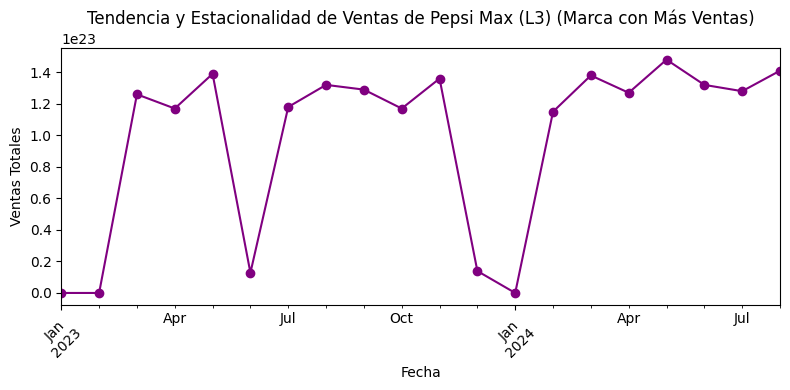

In [ ]:
# Crear la gráfica de líneas para mostrar la tendencia y estacionalidad de las ventas de la marca Pepsi Max (L3)
plt.figure(figsize=(8, 4))
sales_trend_seasonality_brand.plot(kind='line', marker='o', color='purple')
plt.title("Tendencia y Estacionalidad de Ventas de Pepsi Max (L3) (Marca con Más Ventas)")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Tendencia**: Las ventas se mantienen consistentemente altas en ambos años, con valores especialmente elevados en varios meses.

**Estacionalidad**: Se observan picos en los meses de marzo, mayo, agosto y noviembre, lo que sugiere que las ventas de Pepsi Max aumentan en ciertos períodos del año, repitiendo este patrón en 2023 y 2024.

## 3. Cuáles son las predicciones hechas en España y ¿cómo de buenas son?

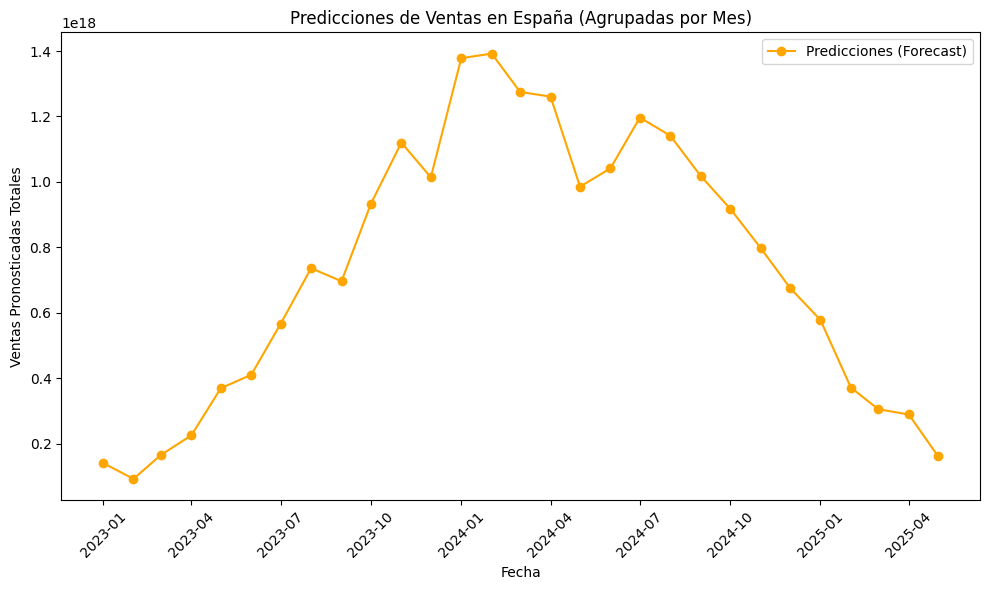

In [ ]:
# Convertir 'AMOUNT' a valores numéricos
df['AMOUNT'] = pd.to_numeric(df['AMOUNT'].str.replace(',', '.'), errors='coerce')

# Crear la columna 'DATE' para facilitar el análisis temporal
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str), format='%Y-%m')

# Filtrar las predicciones (AI_forecast) para España
forecast_spain_df = df[(df['SCENARIO'] == 'AI_forecast') & (df['COUNTRY'] == 'Spain')]

# Agrupar las predicciones por mes y año en España
monthly_forecast_spain = forecast_spain_df.groupby(forecast_spain_df['DATE'].dt.to_period("M"))['AMOUNT'].sum()

# Convertir el índice a un formato de fecha para graficarlo
monthly_forecast_spain.index = monthly_forecast_spain.index.to_timestamp()

# Crear la gráfica de predicciones para España
plt.figure(figsize=(10, 6))
plt.plot(monthly_forecast_spain.index, monthly_forecast_spain.values, label='Predicciones (Forecast)', color='orange', marker='o')
plt.title("Predicciones de Ventas en España (Agrupadas por Mes)")
plt.xlabel("Fecha")
plt.ylabel("Ventas Pronosticadas Totales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


La gráfica muestra las predicciones de ventas en España agrupadas por mes. En ella, se observa una tendencia de aumento en las ventas pronosticadas desde principios de 2023 hasta un pico alrededor de octubre de 2023. A partir de ahí, las predicciones muestran una disminución gradual en las ventas pronosticadas hasta abril de 2025.

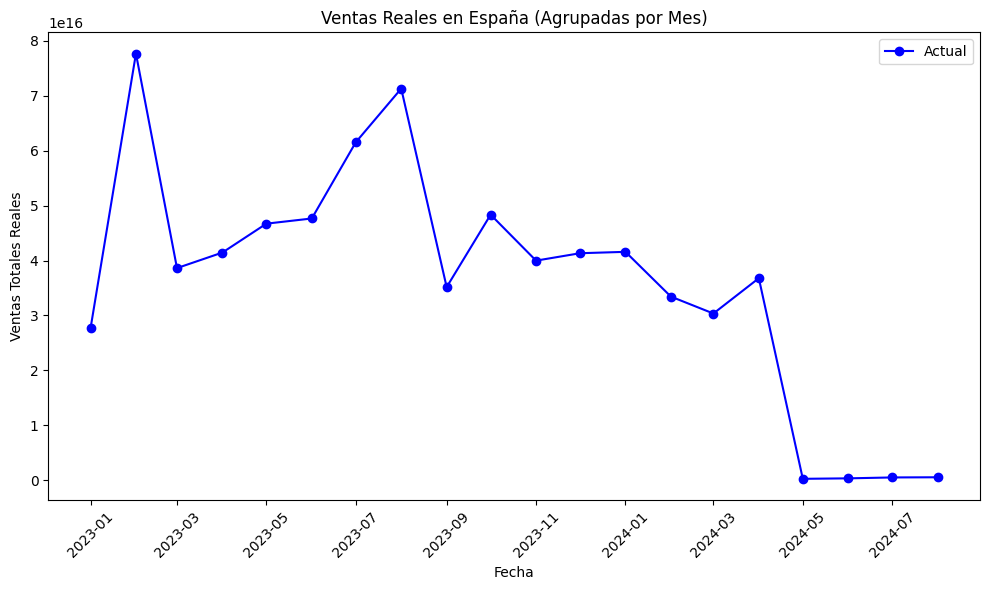

In [ ]:
# Filtrar los valores reales (actual) para España
actual_spain_df = df[(df['SCENARIO'] == 'actual') & (df['COUNTRY'] == 'Spain')]

# Agrupar las ventas reales por mes y año en España
monthly_actual_sales_spain = actual_spain_df.groupby(actual_spain_df['DATE'].dt.to_period("M"))['AMOUNT'].sum()

# Convertir el índice a un formato de fecha para graficarlo
monthly_actual_sales_spain.index = monthly_actual_sales_spain.index.to_timestamp()

# Crear la gráfica de ventas reales para España
plt.figure(figsize=(10, 6))
plt.plot(monthly_actual_sales_spain.index, monthly_actual_sales_spain.values, label='Actual', color='blue', marker='o')
plt.title("Ventas Reales en España (Agrupadas por Mes)")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales Reales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Unimos los valores actuales y los predichos en una gráfica

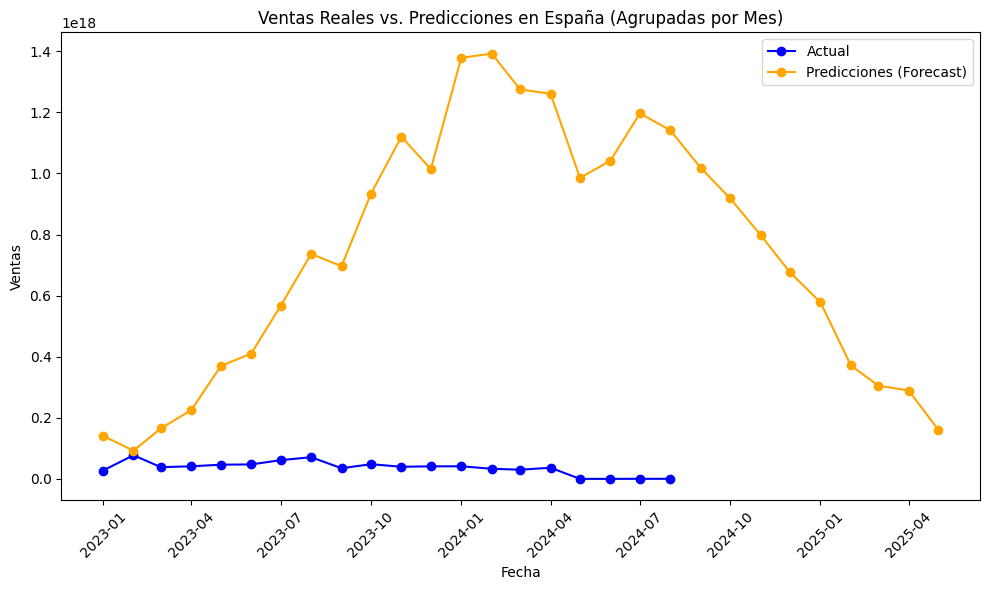

In [ ]:
# Unimos los valores actuales y los predichos en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(monthly_actual_sales_spain.index, monthly_actual_sales_spain.values, label='Actual', color='blue', marker='o')
plt.plot(monthly_forecast_spain.index, monthly_forecast_spain.values, label='Predicciones (Forecast)', color='orange', marker='o')
plt.title("Ventas Reales vs. Predicciones en España (Agrupadas por Mes)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La gráfica muestra una gran diferencia entre las ventas reales y las predicciones en España. Las predicciones (en naranja) están mucho más altas que los valores reales (en azul) en casi todos los meses, lo que sugiere que el modelo está sobreestimando las ventas. Además, mientras las predicciones siguen una especie de patrón cíclico con un pico a mediados de 2023 y una caída hasta 2025, las ventas reales se mantienen bastante estables y bajas. Esto indica que el modelo no refleja bien el comportamiento real de las ventas en España y necesitaría algunos ajustes para hacer predicciones más precisas.